In [31]:
library(dslabs)
library(tidyverse)

#using theme_bw() as default
theme_set(theme_bw())

# The Dataset

This dataset includes weekly reported counts data for 7 diseases from 1928 to 2011
from all 50 states.  

* disease. A factor containing disease names.

* state. A factor containing state names.

* year.

* weeks_reporting. Number of weeks counts were reported that year.

* count. Total number of reported cases.

* population. State population, interpolated for non-census years.

In [5]:
head(us_contagious_diseases)

disease,state,year,weeks_reporting,count,population
Hepatitis A,Alabama,1966,50,321,3345787
Hepatitis A,Alabama,1967,49,291,3364130
Hepatitis A,Alabama,1968,52,314,3386068
Hepatitis A,Alabama,1969,49,380,3412450
Hepatitis A,Alabama,1970,51,413,3444165
Hepatitis A,Alabama,1971,51,378,3481798


In [6]:
str(us_contagious_diseases)

'data.frame':	16065 obs. of  6 variables:
 $ disease        : Factor w/ 7 levels "Hepatitis A",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ state          : Factor w/ 51 levels "Alabama","Alaska",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ year           : num  1966 1967 1968 1969 1970 ...
 $ weeks_reporting: num  50 49 52 49 51 51 45 45 45 46 ...
 $ count          : num  321 291 314 380 413 378 342 467 244 286 ...
 $ population     : num  3345787 3364130 3386068 3412450 3444165 ...


In [11]:
#disease names
levels(us_contagious_diseases$disease)

[1] "Hepatitis A" "Measles"     "Mumps"       "Pertussis"   "Polio"      
[6] "Rubella"     "Smallpox"

In [13]:
#state names
levels(us_contagious_diseases$state)

[1] "Alabama"              "Alaska"               "Arizona"             
 [4] "Arkansas"             "California"           "Colorado"            
 [7] "Connecticut"          "Delaware"             "District Of Columbia"
[10] "Florida"              "Georgia"              "Hawaii"              
[13] "Idaho"                "Illinois"             "Indiana"             
[16] "Iowa"                 "Kansas"               "Kentucky"            
[19] "Louisiana"            "Maine"                "Maryland"            
[22] "Massachusetts"        "Michigan"             "Minnesota"           
[25] "Mississippi"          "Missouri"             "Montana"             
[28] "Nebraska"             "Nevada"               "New Hampshire"       
[31] "New Jersey"           "New Mexico"           "New York"            
[34] "North Carolina"       "North Dakota"         "Ohio"                
[37] "Oklahoma"             "Oregon"               "Pennsylvania"        
[40] "Rhode Island"         "South Carolina"       "South Dakota"        
[43] "Tennessee"            "Texas"                "Utah"                
[46] "Vermont"              "Virginia"             "Washington"          
[49] "West Virginia"        "Wisconsin"            "Wyoming"

# Case Study

We create a temporary object called `dat` that stores all the **measles**(a name of a disease) data.  
It includes a per 100,000 rate, orders states by average value of disease,
and removes Alaska and Hawaii, since they only
became states in the late 50s.

In [112]:
the_disease <- 'Measles'

dat <- us_contagious_diseases %>%
filter(!state %in% c('Alaska', 'Hawaii') & disease == the_disease) %>%      
mutate(rate = count / population* 10000) %>%
mutate(state = reorder(state, rate))

head(dat)

disease,state,year,weeks_reporting,count,population,rate
Measles,Alabama,1928,52,8843,2589923,34.143872
Measles,Alabama,1929,49,2959,2619131,11.297640
Measles,Alabama,1930,52,4156,2646248,15.705255
Measles,Alabama,1931,49,8934,2670818,33.450426
Measles,Alabama,1932,41,270,2693027,1.002589
Measles,Alabama,1933,51,1735,2713243,6.394562


We can now easily plot disease rates for per year.  
Let see what happened for California

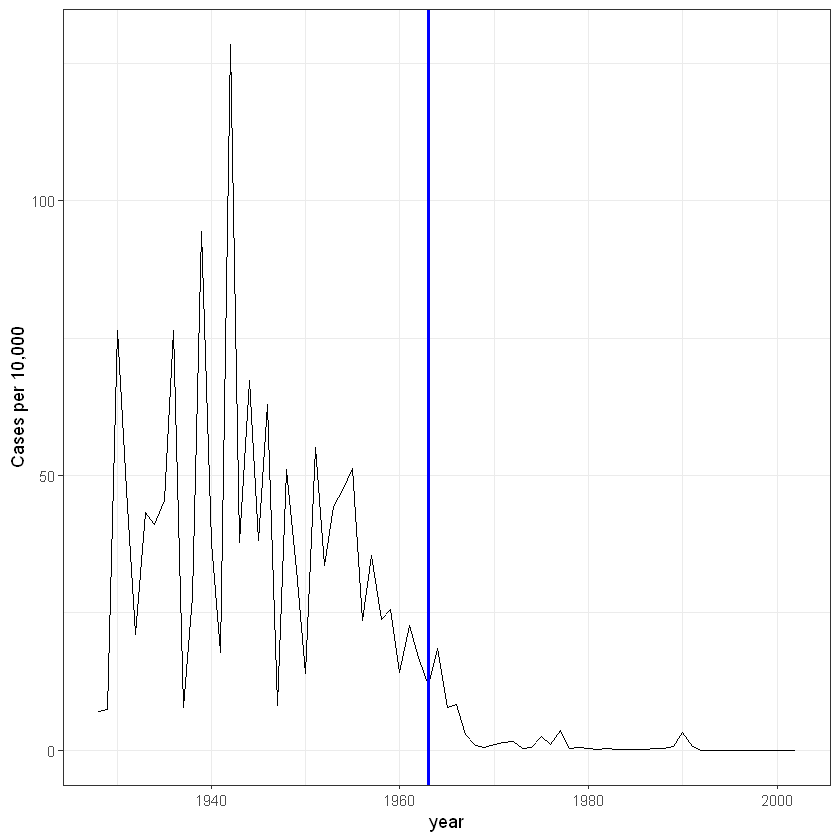

In [113]:
dat %>%
filter(state == 'California') %>%
ggplot(aes(year, rate)) + 
geom_line() +
#We add a vertical line at 1963, since this is when the vaccine was introduced.
geom_vline(xintercept = 1963, color = 'blue', size = 1) +
ylab('Cases per 10,000')

Now can we show data for all states in one plot?
We have three variables to show: year, state, and rate.

In [114]:
library(RColorBrewer)

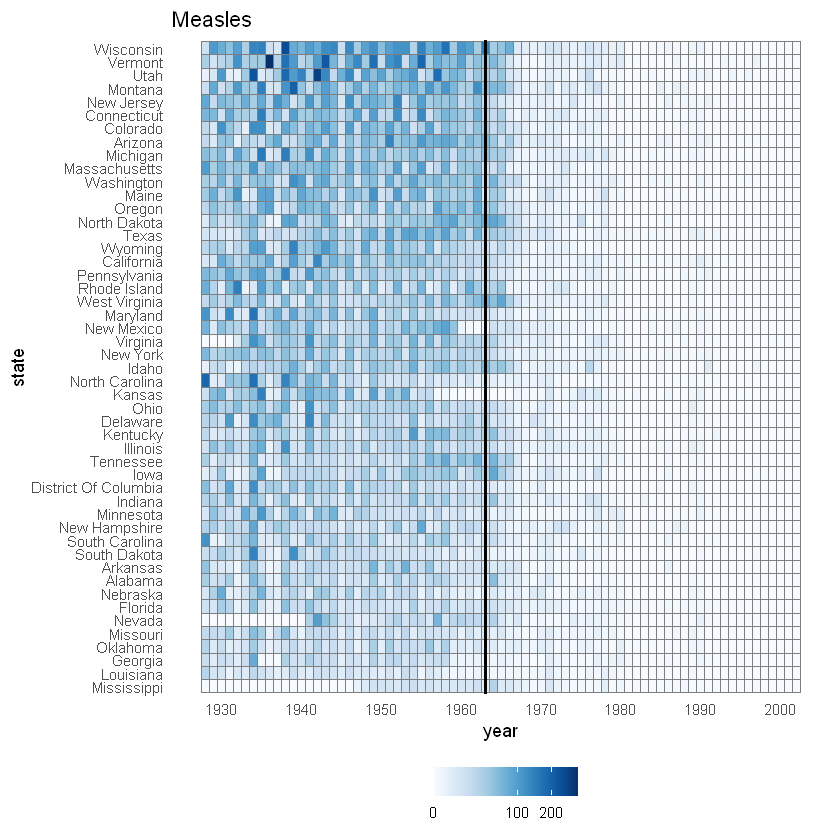

In [115]:
dat %>%
ggplot(aes(y = state, x = year, fill = rate)) +
geom_tile(color = 'grey50') +
geom_vline(xintercept = 1963, color = 'black', size = 1) + 
scale_x_continuous(breaks = seq(1930, 2010, 10)) +
#We use square root transformation to avoid having the really high counts dominate the plot.
scale_fill_gradientn(colors = brewer.pal(9, 'Blues'), trans = 'sqrt') +
ggtitle('Measles') + 
theme_minimal() +
theme(legend.position = 'bottom',
      legend.direction = 'horizontal', 
      legend.title = element_blank(),  #Turn off legend title
      panel.grid = element_blank())    #Turn off grid 

However, one limitation of this plot is that it uses color
to represent quantity, which we earlier explained makes it a bit harder to know
exactly how high it is going.
Position and length are better cues.
If we are willing to lose data information,
we can make a version of the plot that shows the values with position.

`summarise()` ungrouping output (override with `.groups` argument)


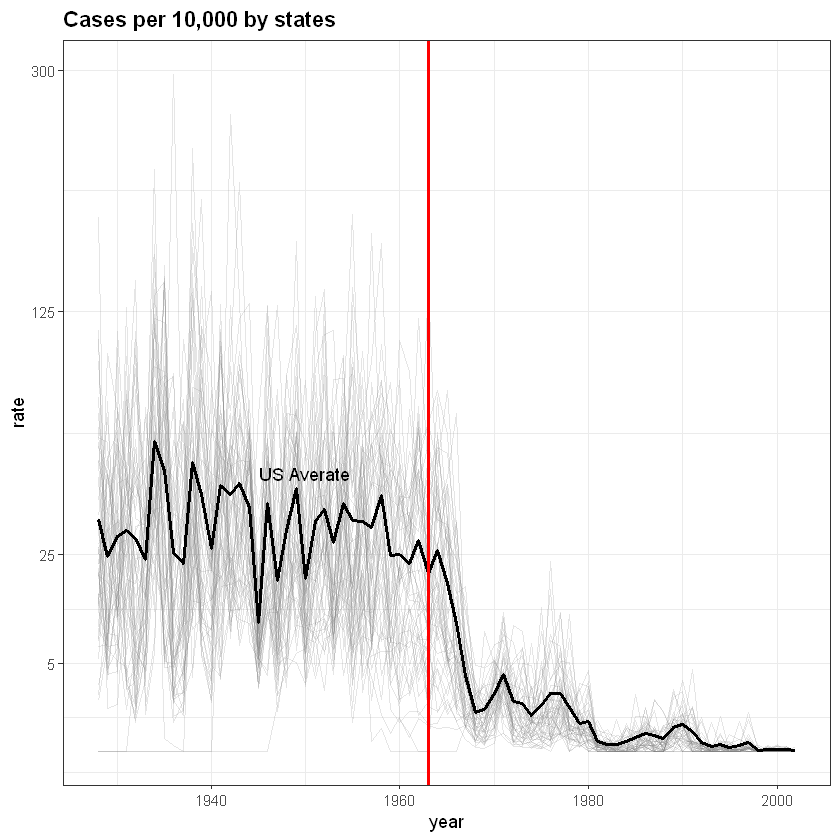

In [131]:
ggplot(dat, aes(year, rate)) + 
geom_line(aes(group = state), color = 'grey50', alpha = .2) +
#Average rate per year
geom_line(data = dat %>% group_by(year) %>% summarize(avg_rate = mean(rate)),
          mapping = aes(year, avg_rate),
          size = 1, color = 'black') +
annotate(x = 1950, y = 50, label = 'US Averate',geom = 'text') +
#The year when vaccine is first introduced
geom_vline(xintercept = 1963, color = 'red', size = 1) +
#Year sqrt scale y to aid the change of rate
scale_y_continuous(trans = 'sqrt', breaks = c(5, 25, 125, 300)) +
ggtitle('Cases per 10,000 by states') +
theme(plot.title = element_text(face = 'bold'))

It shows very clearly how after the vaccine was introduced
the rates went down across all states.
It shows the same information as our previous plot,
but now we can actually see what the values are.